<a href="https://colab.research.google.com/github/AIPI510/aipi510-fall24/blob/lecture-code/week_5_lecture_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Example

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map the target to species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

## Questions we are asking:
* What are the dimensions of the dataset (number of rows and columns)?
* What are the data types of the variables (numerical, categorical, text, etc.)?
* Are there any missing values, and if so, how are they represented?


In [ ]:
# Data Structure
print("Data Structure")
print("---------------")
print(f"Dimensions: {df.shape}")
print(f"Data Types:\n{df.dtypes}")
print(f"Missing Values:\n{df.isnull().sum()}")


Data Structure
---------------
Dimensions: (150, 5)
Data Types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object
Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


##Interpretation

This indicates that there are 150 observations (samples) of iris flowers, with each observation having 4 feature measurements and 1 target (species) label.

The numerical features represent the measurements of the iris flowers (sepal length, sepal width, petal length, petal width), while the categorical feature represents the species of the iris flower.

The dataset is complete, and no imputation or deletion of rows/columns is necessary.

## Questions we are asking:
* What are the central tendency measures (mean, median, mode) for numerical variables?
* What are the measures of dispersion (range, variance, standard deviation) for numerical variables?
* What is the distribution of the variables (normal, skewed, etc.)?


In [ ]:
# Descriptive Statistics
print("\nDescriptive Statistics")
print("----------------------")
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df[numeric_columns].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df[numeric_columns].describe().loc[['std', 'min', 'max']])

# Check for distribution normality (skewness and kurtosis)
print("\nDistribution Measures:")
print("------------------------")
print(df[numeric_columns].skew())
print(df[numeric_columns].kurt())


Descriptive Statistics
----------------------
Central Tendency Measures:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
mean           5.843333          3.057333              3.758          1.199333
50%            5.800000          3.000000              4.350          1.300000

Dispersion Measures:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
std           0.828066          0.435866           1.765298          0.762238
min           4.300000          2.000000           1.000000          0.100000
max           7.900000          4.400000           6.900000          2.500000

Distribution Measures:
------------------------
sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64
sepal length (cm)   -0.552064
sepal width (cm)     0.228249
petal length (cm)   -1.402103
petal width (cm)    -1.340604
dtype: float64


## Interpretation

#### Descriptive Statistics
The mean and median provide insights into the central location of the data. For example, the mean sepal length is around 5.84 cm, and the median is around 5.80 cm, indicating a roughly symmetric distribution.

#### Dispersion Measures
These measures give us an understanding of the spread and range of the data. For instance, the standard deviation of sepal length is about 0.83 cm, indicating the typical deviation from the mean.
Distribution Measures: Skewness and kurtosis of the numerical features.

#### Distribution Measures
Skewness values close to 0 indicate a symmetric distribution, while positive or negative values indicate right or left skew, respectively. Kurtosis indicates the "tailedness" of the distribution; values close to 0 suggest a normal distribution, while higher values suggest heavier tails.

## Questions we are asking:
* Are there any duplicated rows or inconsistent values?
* Are there any outliers or extreme values that need attention?
* Do the values make sense based on the context and domain knowledge?


In [ ]:
# Data Quality
print("\nData Quality")
print("------------")
print(f"Duplicated Rows: {df.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))


Data Quality
------------
Duplicated Rows: 1
Checking for Inconsistent Values:
                  most_frequent_value
sepal length (cm)                 5.0
sepal width (cm)                  3.0
petal length (cm)                 1.4
petal width (cm)                  0.2
species                        setosa


## Interpretation

Duplicated Rows: There are no duplicated rows in the dataset.


Inconsistent Values: Most frequent values for each column. This helps identify any potential inconsistencies or anomalies. For example, if an unusually high frequency is observed for a specific value, it might indicate an issue with data collection or entry.

## Questions we are asking:

* Is there any correlation between pairs of numerical variables?
* Are there any noticeable patterns or trends in the data?
* How are categorical variables related to numerical variables?



Variable Relationships
----------------------
Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


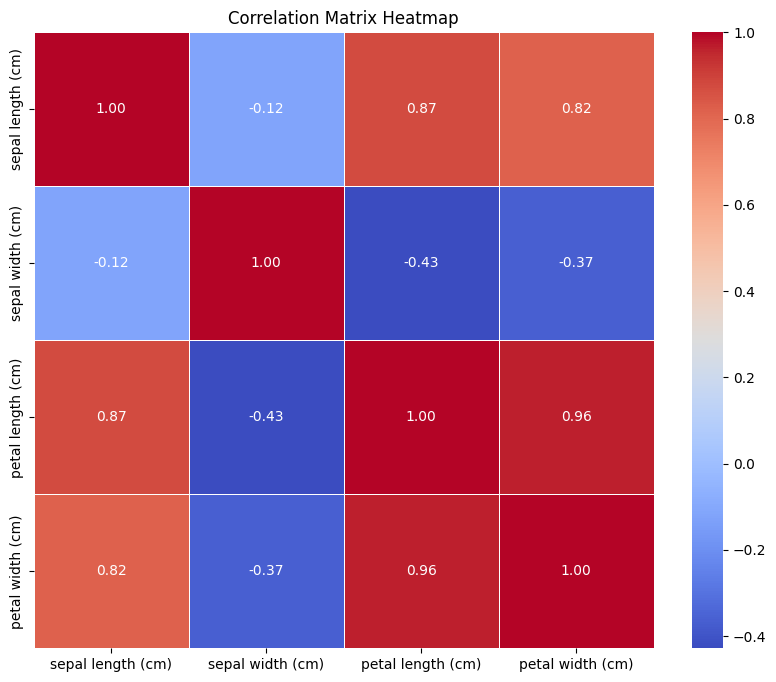

In [ ]:
# Variable Relationships
print("\nVariable Relationships")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

# Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Interpretation

Positive correlation values (close to 1) indicate a strong direct relationship, while negative values (close to -1) indicate an inverse relationship.
For example, petal length and petal width have a high positive correlation (0.96), suggesting that as petal length increases, petal width also tends to increase.

## Questions we are asking:

* How can the variables be visualized effectively (histograms, scatterplots, box plots, etc.)?
* Do the visualizations reveal any interesting patterns or insights?
* Are there any subgroups or clusters that can be identified visually?


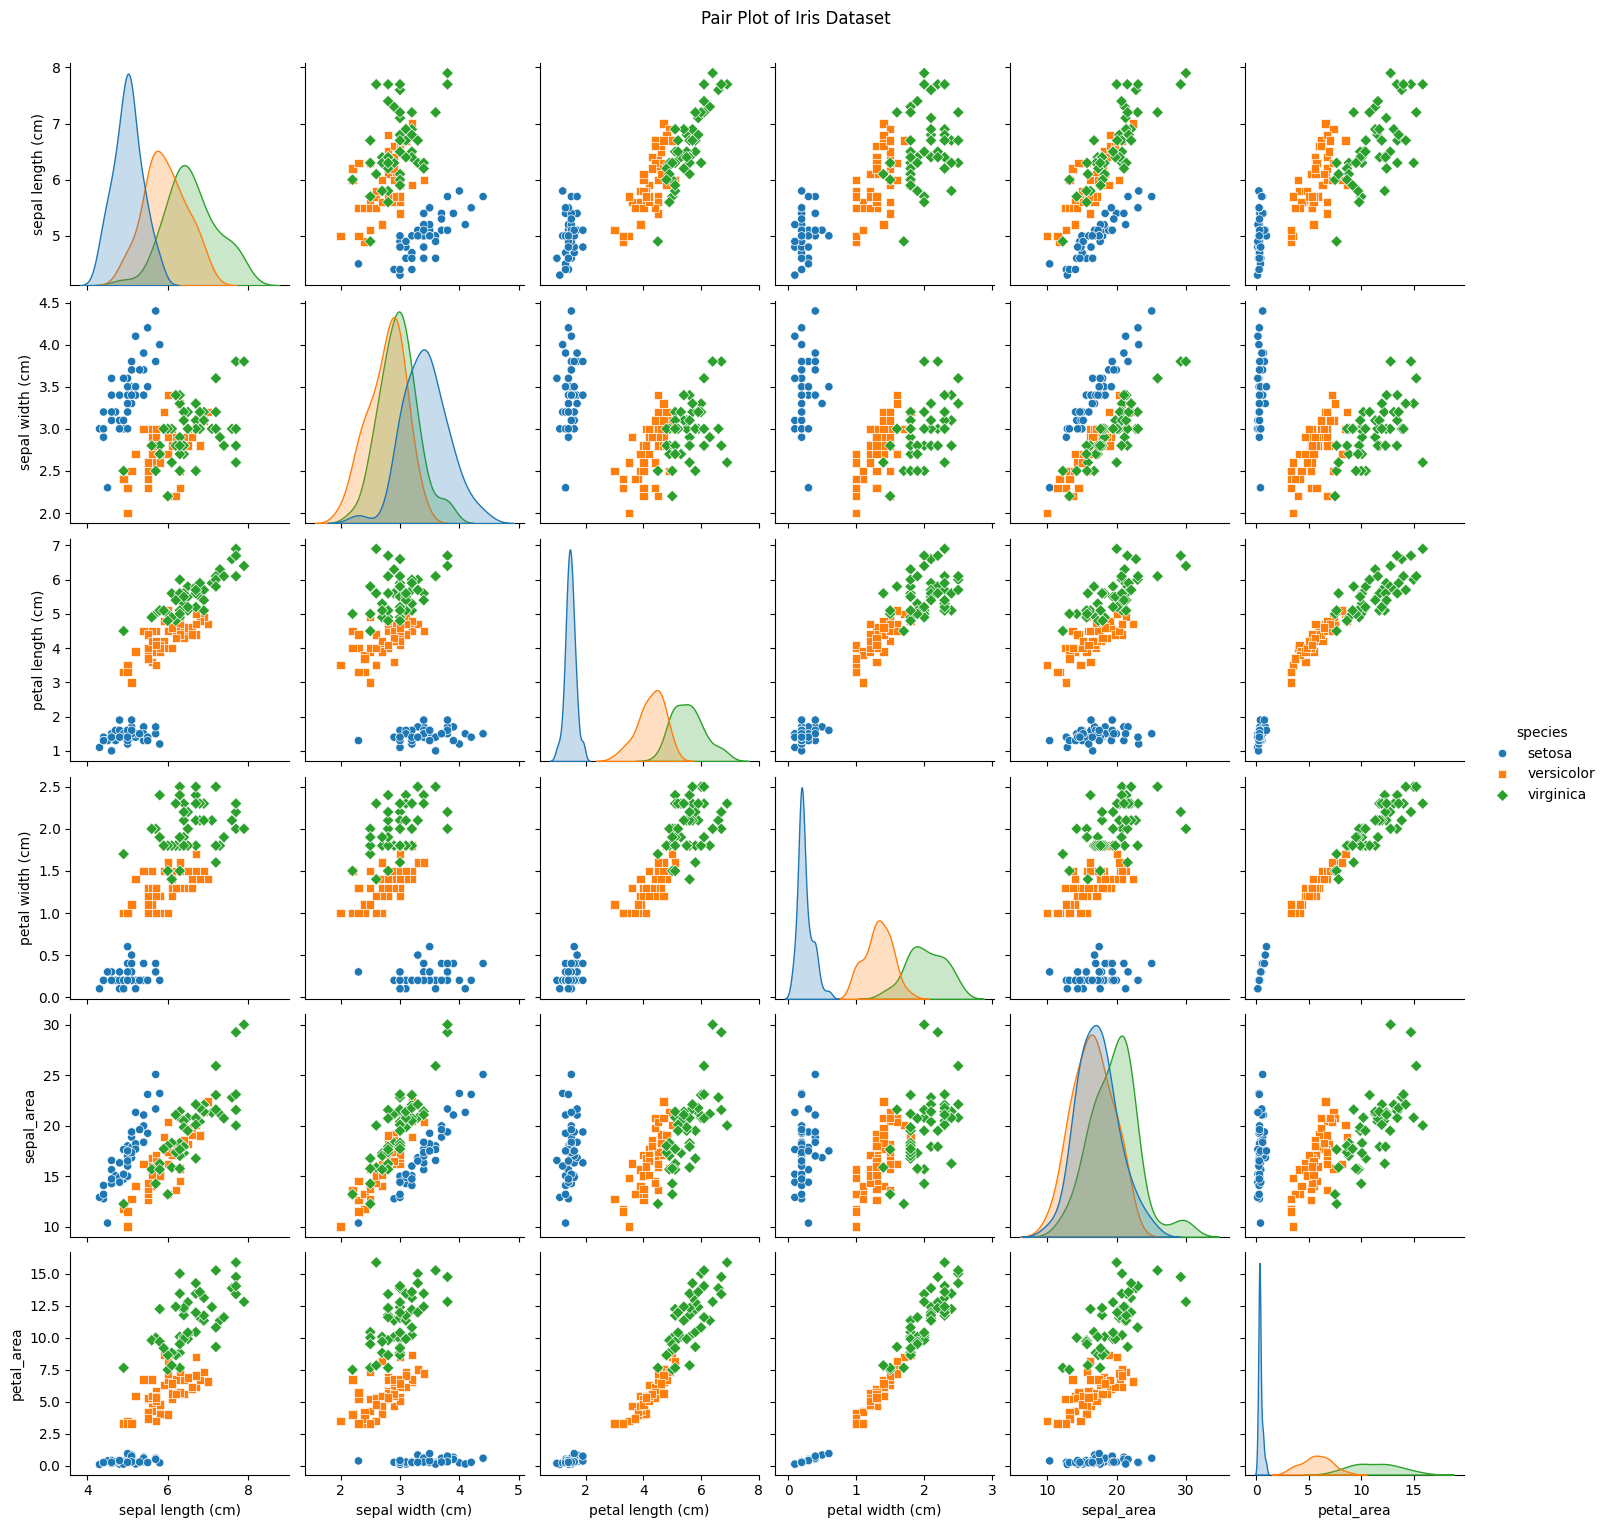

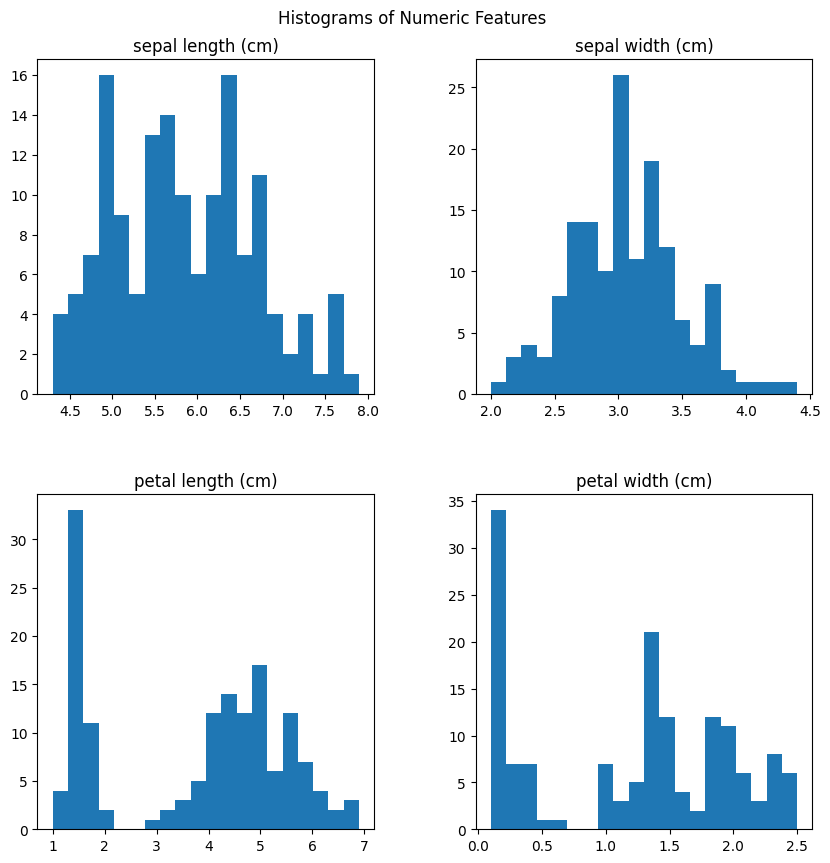

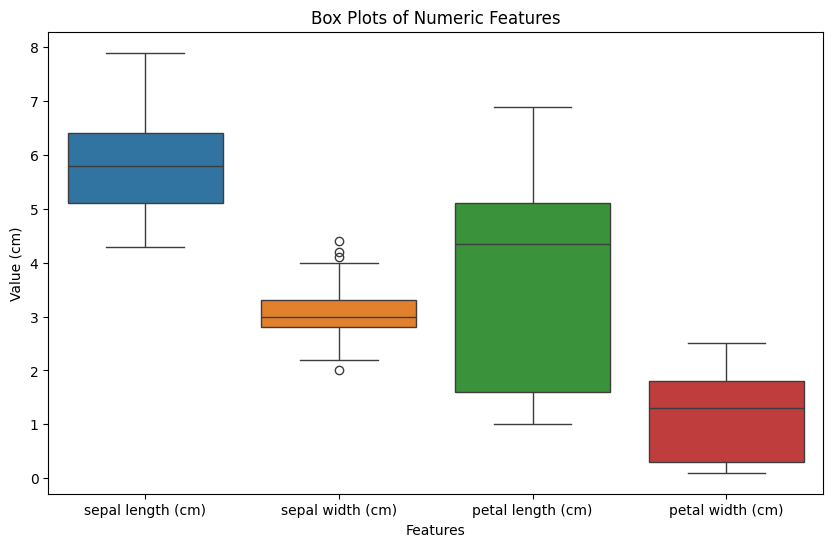

In [ ]:
# Data Visualization
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

# Visualize distributions
df[numeric_columns].hist(bins=20, figsize=(10,10), grid=False)
plt.suptitle('Histograms of Numeric Features', y=0.93)
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.title('Box Plots of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Value (cm)')
plt.show()

## Interpretation

#### Pair Plot:

This visualization shows the relationships between pairs of features and how they differ across species. Clusters of points indicate potential separability of species based on feature measurements.

#### Histograms:

Histograms display the distribution of each numerical feature. For example, the histogram of petal length shows a bimodal distribution, indicating distinct groups within the data, likely corresponding to different species.

#### Box Plots:

Box plots highlight the spread of the data and potential outliers. For instance, the box plot of sepal width reveals some outliers, suggesting some iris flowers have unusually large or small sepal widths.

## Questions we are asking:

* Are there any new features that can be derived from the existing ones?
* Is there a need to transform or scale any variables?
* Are there any variables that can be combined or decomposed?



Feature Engineering
-------------------
New Features: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'sepal_area', 'petal_area'],
      dtype='object')


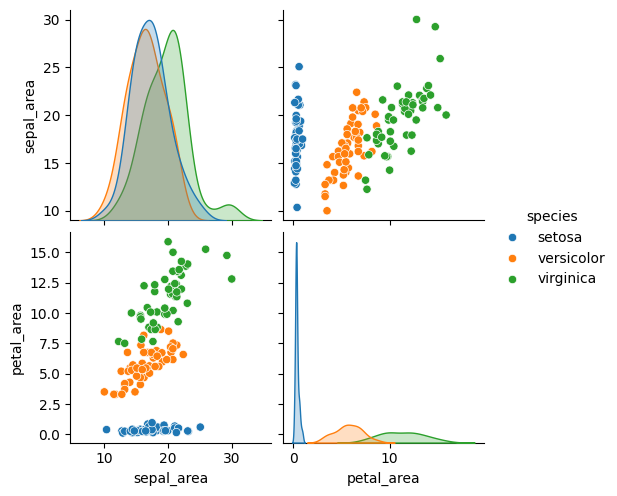

In [ ]:
# Feature Engineering
print("\nFeature Engineering")
print("-------------------")
df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']
df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']
print(f"New Features: {df.columns}")

# Visualize new features
sns.pairplot(df, hue='species', vars=['sepal_area', 'petal_area'])
plt.show()

## Interpretation

#### New Features (Sepal Area and Petal Area):
Creating new features like sepal area and petal area might help in better classifying the iris species. These new features are derived from existing ones and could provide more meaningful insights or improve model performance.

The histograms of sepal area and petal area show their distribution. For example, petal area has a more distinct separation between species compared to individual measurements.

The box plots show how the new features vary across different species. For example, the box plot of petal area by species shows clear separations, indicating that petal area is a strong differentiator between species.

# Interpretation for Machine Learning

#### Dimensions:
Knowing the dataset's size helps in selecting appropriate algorithms. For instance, with 150 samples, complex algorithms might be overkill, while simpler models like k-Nearest Neighbors or Decision Trees could be more suitable.

#### Data Types:
Understanding data types helps in preprocessing. Numerical features are typically normalized or standardized, while categorical features are one-hot encoded. Here, the species column should be encoded appropriately for the model.

#### Missing Values:
The absence of missing values simplifies preprocessing, ensuring no imputation or row/column deletion is needed.

#### Descriptive Statistics
Central Tendency Measures help understand the typical values of features, useful for feature scaling. For example, normalization can ensure that features with different scales contribute equally to the model.

#### Dispersion Measures
High variance features might dominate the model training, while low variance features might be less informative. Standardization can be applied to address this.
#### Distribution Measures
Skewed features may require transformation (like log transformation) to make the data more normally distributed, which some models assume.

#### Data Quality
No duplicates mean no need for additional cleaning steps, ensuring each sample contributes unique information.
Inconsistent Values:


#### Variable Relationships
Highly correlated features might be redundant. Techniques like Principal Component Analysis (PCA) can reduce dimensionality without losing much information. Highly correlated features can also provide insights into feature importance.
#### Data Visualization
***Pair Plot:***

Visual confirmation of separability between classes guides model selection. If classes are linearly separable, simple models like Logistic Regression might work well. For non-linear separability, models like SVM or Neural Networks might be required.

***Histograms:***

Feature distributions inform preprocessing steps. For instance, bimodal distributions might indicate the presence of subgroups within the data that could be separately analyzed or modeled.

***Box Plots:***

Outliers detected via box plots might need to be handled via techniques like clipping, transformation, or exclusion to improve model performance.

#### Feature Engineering
New features can enhance model performance by providing more discriminative power. Features derived from domain knowledge often capture important patterns that raw features do not.

***Histograms of New Features:***

Evaluating the distribution of new features helps in understanding their potential impact on model performance. Features with clear separation between classes can be very beneficial.

***Box Plots of New Features by Species:***

Guidance: Clear separation in box plots suggests that these features are effective at differentiating classes, likely improving the model's ability to classify accurately.

# Visualizations

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


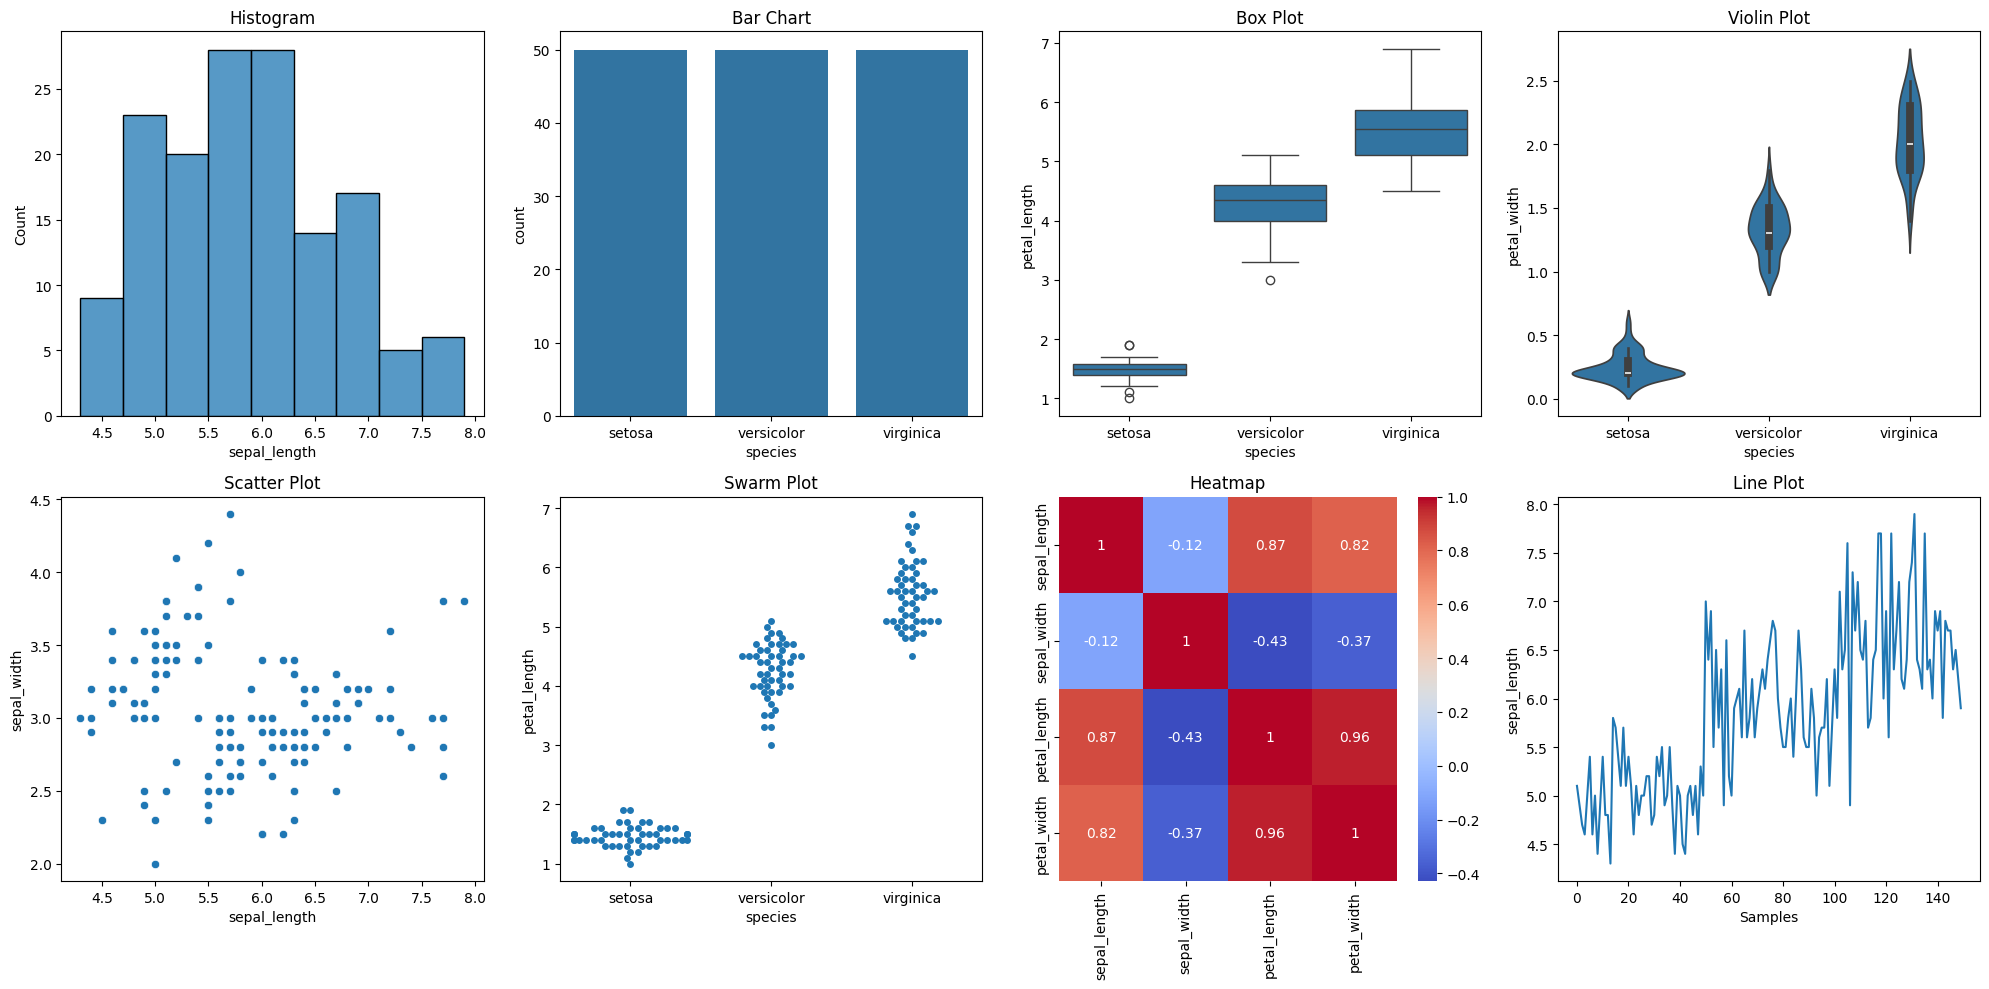

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = sns.load_dataset("iris")

# Create a figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Histogram
sns.histplot(data=iris_df, x="sepal_length", ax=axes[0, 0])
axes[0, 0].set_title('Histogram')

# Bar chart
sns.countplot(x="species", data=iris_df, ax=axes[0, 1])
axes[0, 1].set_title('Bar Chart')

# Box plot
sns.boxplot(x="species", y="petal_length", data=iris_df, ax=axes[0, 2])
axes[0, 2].set_title('Box Plot')

# Violin plot
sns.violinplot(x="species", y="petal_width", data=iris_df, ax=axes[0, 3])
axes[0, 3].set_title('Violin Plot')

# Scatter plot
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris_df, ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot')

# Swarm plot
sns.swarmplot(x="species", y="petal_length", data=iris_df, ax=axes[1, 1])
axes[1, 1].set_title('Swarm Plot')

# Heatmap
# Drop the species column before calculating the correlation matrix
corr_df = iris_df.drop("species", axis=1).corr()
sns.heatmap(corr_df, annot=True, cmap="coolwarm", ax=axes[1, 2])
axes[1, 2].set_title('Heatmap')

# Line plot
sns.lineplot(x=iris_df.index, y="sepal_length", data=iris_df, ax=axes[1, 3])
axes[1, 3].set_title('Line Plot')
axes[1, 3].set_xlabel("Samples")

# Adjust layout
plt.tight_layout()
plt.show()



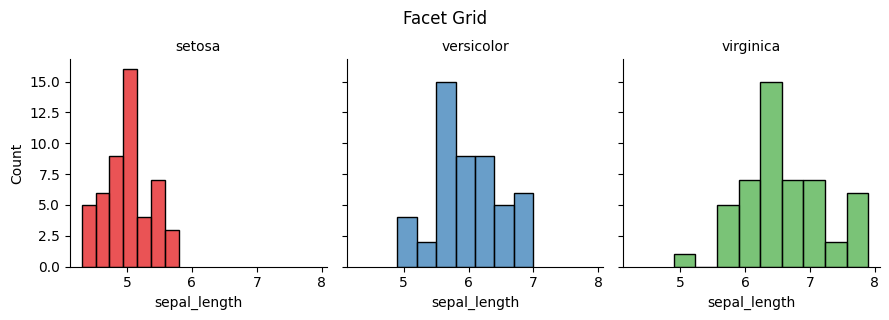

In [ ]:
# Facet grid
g = sns.FacetGrid(iris_df, col="species", hue="species", palette="Set1", col_wrap=3)
g.map(sns.histplot, "sepal_length")
g.set_titles("{col_name}")
g.fig.suptitle("Facet Grid", y=1.05)
plt.show()

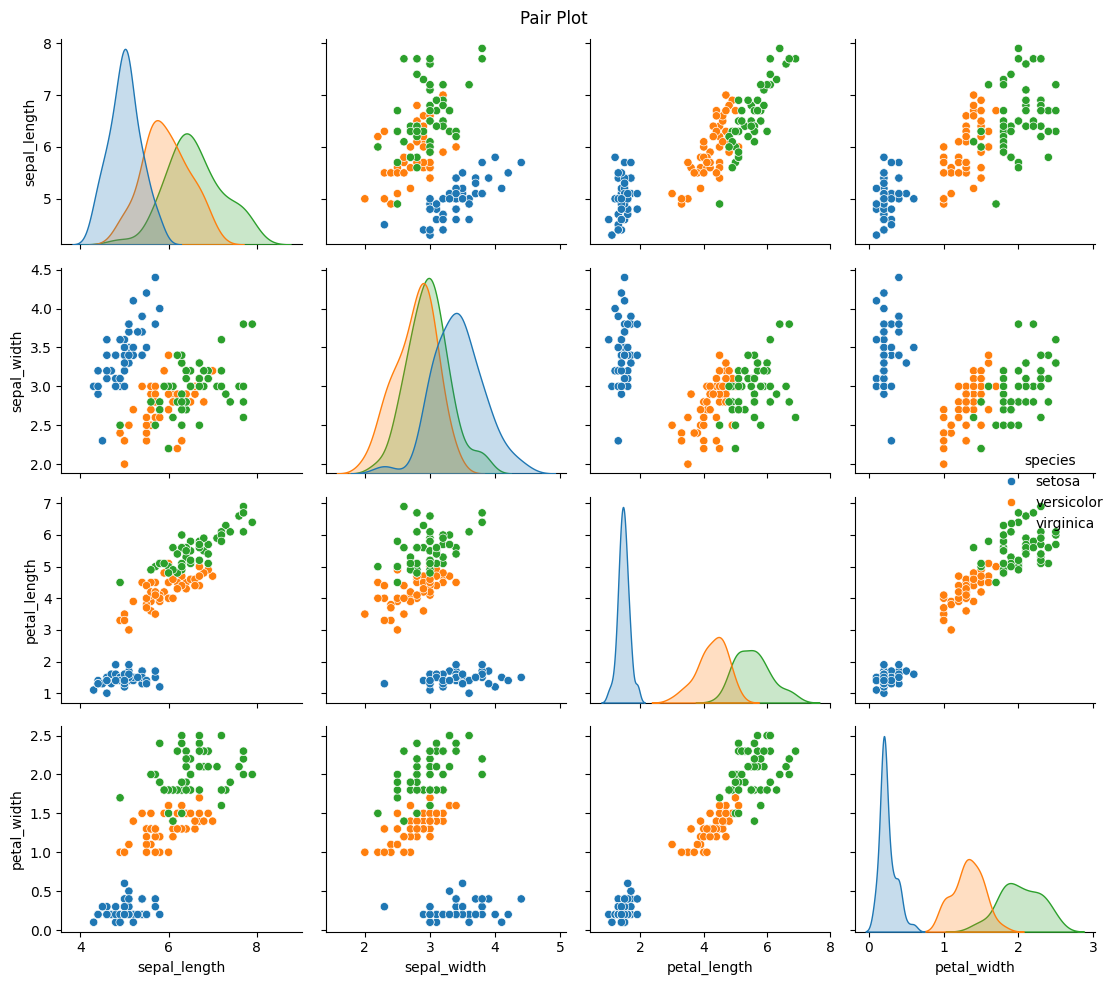

In [ ]:
# Pair plot
sns.pairplot(iris_df, hue="species", diag_kind="kde")
plt.suptitle('Pair Plot')
plt.tight_layout()
plt.show()